<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r3_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r3-good.csv?token=AKVFSOC32U3QKM27AB7FKDC6X2K6M"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r3-mal.csv?token=AKVFSOCRMKVHRSBZF3RFO3C6X2K6I"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [34]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,19,1,4,1,1,4,3,9,0,0,23,7,0,4,3,0.75,16,2,1,2,2,4,4,1,4,0,3,27,9,1
1,82,1,4,3,1,4,3,9,18,2,23,7,0,2,1,0.50,8,1,2,2,2,4,4,3,12,0,9,27,27,1
2,360,1,4,1,1,4,3,9,0,0,23,7,3,4,3,0.75,16,1,1,1,1,1,4,1,4,12,3,27,9,1
3,420,1,4,3,1,4,3,9,18,2,23,7,3,2,1,0.50,8,1,1,1,1,1,4,3,12,36,9,27,27,1
4,636,1,4,1,1,4,3,9,0,0,23,7,6,4,3,0.75,16,1,1,1,1,1,4,1,4,24,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13016,3250676,1,4,5,3,2,3,9,0,0,23,7,10018,4,3,0.75,30,1,1,1,1,1,4,15,30,300540,15,27,45,1
13017,3250683,1,4,5,4,2,3,9,0,0,23,7,10018,4,3,0.75,37,1,1,1,1,1,4,20,40,400720,15,27,45,1
13018,3250690,1,4,5,5,3,3,9,0,0,23,7,10018,4,3,0.75,44,1,1,1,1,1,4,25,75,751350,15,27,45,1
13019,3250691,1,4,1,1,4,3,10,0,0,23,7,10019,4,3,0.75,44,1,1,1,1,1,4,1,4,40076,3,30,9,1


In [35]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,15,1,4,1,1,4,3,9,1,1,23,7,1,3,2,0.666667,12,3,1,3,3,9,4,1,4,4,3,27,9,0
1,19,1,4,1,1,4,3,10,0,0,23,7,0,4,3,0.750000,16,2,2,3,4,12,4,1,4,0,3,30,9,0
2,78,1,4,3,1,4,3,9,18,2,23,7,1,2,1,0.500000,8,1,3,3,3,9,4,3,12,12,9,27,27,0
3,103,1,4,3,1,4,3,9,18,2,23,7,0,2,1,0.500000,11,1,1,1,1,1,4,3,12,0,9,27,27,0
4,341,1,4,1,1,4,3,9,1,1,23,7,6,3,2,0.666667,12,1,1,1,1,1,4,1,4,24,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15020,2008984,1,4,5,4,2,3,9,0,0,27,11,11064,5,3,0.600000,37,1,1,1,1,1,4,20,40,442560,15,27,45,0
15021,2008991,1,4,5,5,3,3,9,0,0,27,11,11064,5,3,0.600000,44,1,1,1,1,1,4,25,75,829800,15,27,45,0
15022,2008992,1,4,1,1,4,3,10,0,0,27,11,11065,5,3,0.600000,44,1,1,1,1,1,4,1,4,44260,3,30,9,0
15023,2021706,1,4,5,1,1,3,9,1,1,27,11,11080,4,2,0.500000,12,1,1,1,1,1,4,5,5,55400,15,27,45,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [37]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [39]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,15,1,4,1,1,4,3,9,1,1,23,7,1,3,2,0.666667,12,3,1,3,3,9,4,1,4,4,3,27,9,0
1,19,1,4,1,1,4,3,10,0,0,23,7,0,4,3,0.750000,16,2,2,3,4,12,4,1,4,0,3,30,9,0
2,19,1,4,1,1,4,3,9,0,0,23,7,0,4,3,0.750000,16,2,1,2,2,4,4,1,4,0,3,27,9,1
3,78,1,4,3,1,4,3,9,18,2,23,7,1,2,1,0.500000,8,1,3,3,3,9,4,3,12,12,9,27,27,0
4,82,1,4,3,1,4,3,9,18,2,23,7,0,2,1,0.500000,8,1,2,2,2,4,4,3,12,0,9,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28041,3250676,1,4,5,3,2,3,9,0,0,23,7,10018,4,3,0.750000,30,1,1,1,1,1,4,15,30,300540,15,27,45,1
28042,3250683,1,4,5,4,2,3,9,0,0,23,7,10018,4,3,0.750000,37,1,1,1,1,1,4,20,40,400720,15,27,45,1
28043,3250690,1,4,5,5,3,3,9,0,0,23,7,10018,4,3,0.750000,44,1,1,1,1,1,4,25,75,751350,15,27,45,1
28044,3250691,1,4,1,1,4,3,10,0,0,23,7,10019,4,3,0.750000,44,1,1,1,1,1,4,1,4,40076,3,30,9,1


In [40]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,-0.038973,0.071085,0.002279,0.022799,-0.033157,NaN,-0.050702,-0.086906,-0.127205,0.103308,0.120694,0.842492,0.169279,0.127205,0.023698,0.077202,-0.265903,-0.265897,-0.318429,-0.250856,-0.194546,0.134551,0.014946,0.007846,0.429665,0.002279,-0.050702,0.002279,0.406334
outport,-0.038973,1.000000,-0.965695,0.375331,-0.012081,0.017569,NaN,0.644628,0.831363,0.898216,-0.480507,-0.425603,-0.027465,-0.385097,-0.898216,-0.962447,-0.379259,-0.001653,0.110325,0.065070,0.068463,0.056012,-0.307691,0.129393,0.129081,0.076523,0.375331,0.644628,0.375331,-0.021973
inport,0.071085,-0.965695,1.000000,-0.381640,0.023163,-0.033678,NaN,-0.664382,-0.880069,-0.933707,0.632912,0.616964,0.051400,0.561191,0.933707,0.878051,0.405700,-0.010901,-0.108743,-0.071640,-0.078976,-0.069180,0.544216,-0.123632,-0.127290,-0.062910,-0.381640,-0.664382,-0.381640,0.039244
cache_coherence_type,0.002279,0.375331,-0.381640,1.000000,0.425571,-0.617199,NaN,0.028977,0.243572,0.314806,-0.311514,-0.209251,0.015900,-0.127861,-0.314806,-0.342374,-0.439722,0.028983,-0.001736,0.016315,0.026779,0.023569,-0.185780,0.587179,0.465146,0.343340,1.000000,0.028977,1.000000,-0.007607
flit_id,0.022799,-0.012081,0.023163,0.425571,1.000000,-0.118959,NaN,-0.129546,-0.147460,-0.078214,0.149840,0.065679,0.025487,0.086647,0.078214,0.008619,0.534706,0.033662,0.004732,0.022989,0.030469,0.019912,0.045842,0.976277,0.939888,0.712793,0.425571,-0.129546,0.425571,0.007017
flit_type,-0.033157,0.017569,-0.033678,-0.617199,-0.118959,1.000000,NaN,0.187951,0.213936,0.113439,-0.217424,-0.095394,-0.037244,-0.125724,-0.113439,-0.012485,0.341090,-0.039173,0.079287,0.024019,0.000208,-0.001433,-0.066641,-0.220692,0.040021,0.023152,-0.617199,0.187951,-0.617199,-0.010048
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.050702,0.644628,-0.664382,0.028977,-0.129546,0.187951,NaN,1.000000,0.564106,0.612974,-0.411059,-0.398474,-0.032192,-0.357279,-0.612974,-0.588079,-0.144536,0.020553,0.106598,0.076135,0.077585,0.071672,-0.351755,-0.056316,-0.023184,-0.041809,0.028977,1.000000,0.028977,-0.037664
src_ni,-0.086906,0.831363,-0.880069,0.243572,-0.147460,0.213936,NaN,0.564106,1.000000,0.932806,-0.620630,-0.625824,-0.061293,-0.672161,-0.932806,-0.753700,-0.539387,-0.000373,0.101171,0.060355,0.063463,0.057099,-0.538764,-0.016324,0.033612,-0.008600,0.243572,0.564106,0.243572,-0.058605
src_router,-0.127205,0.898216,-0.933707,0.314806,-0.078214,0.113439,NaN,0.612974,0.932806,1.000000,-0.616546,-0.609390,-0.050291,-0.673503,-1.000000,-0.835111,-0.492108,0.030124,0.120986,0.090481,0.090991,0.078989,-0.519319,0.059636,0.083803,0.032536,0.314806,0.612974,0.314806,-0.162754


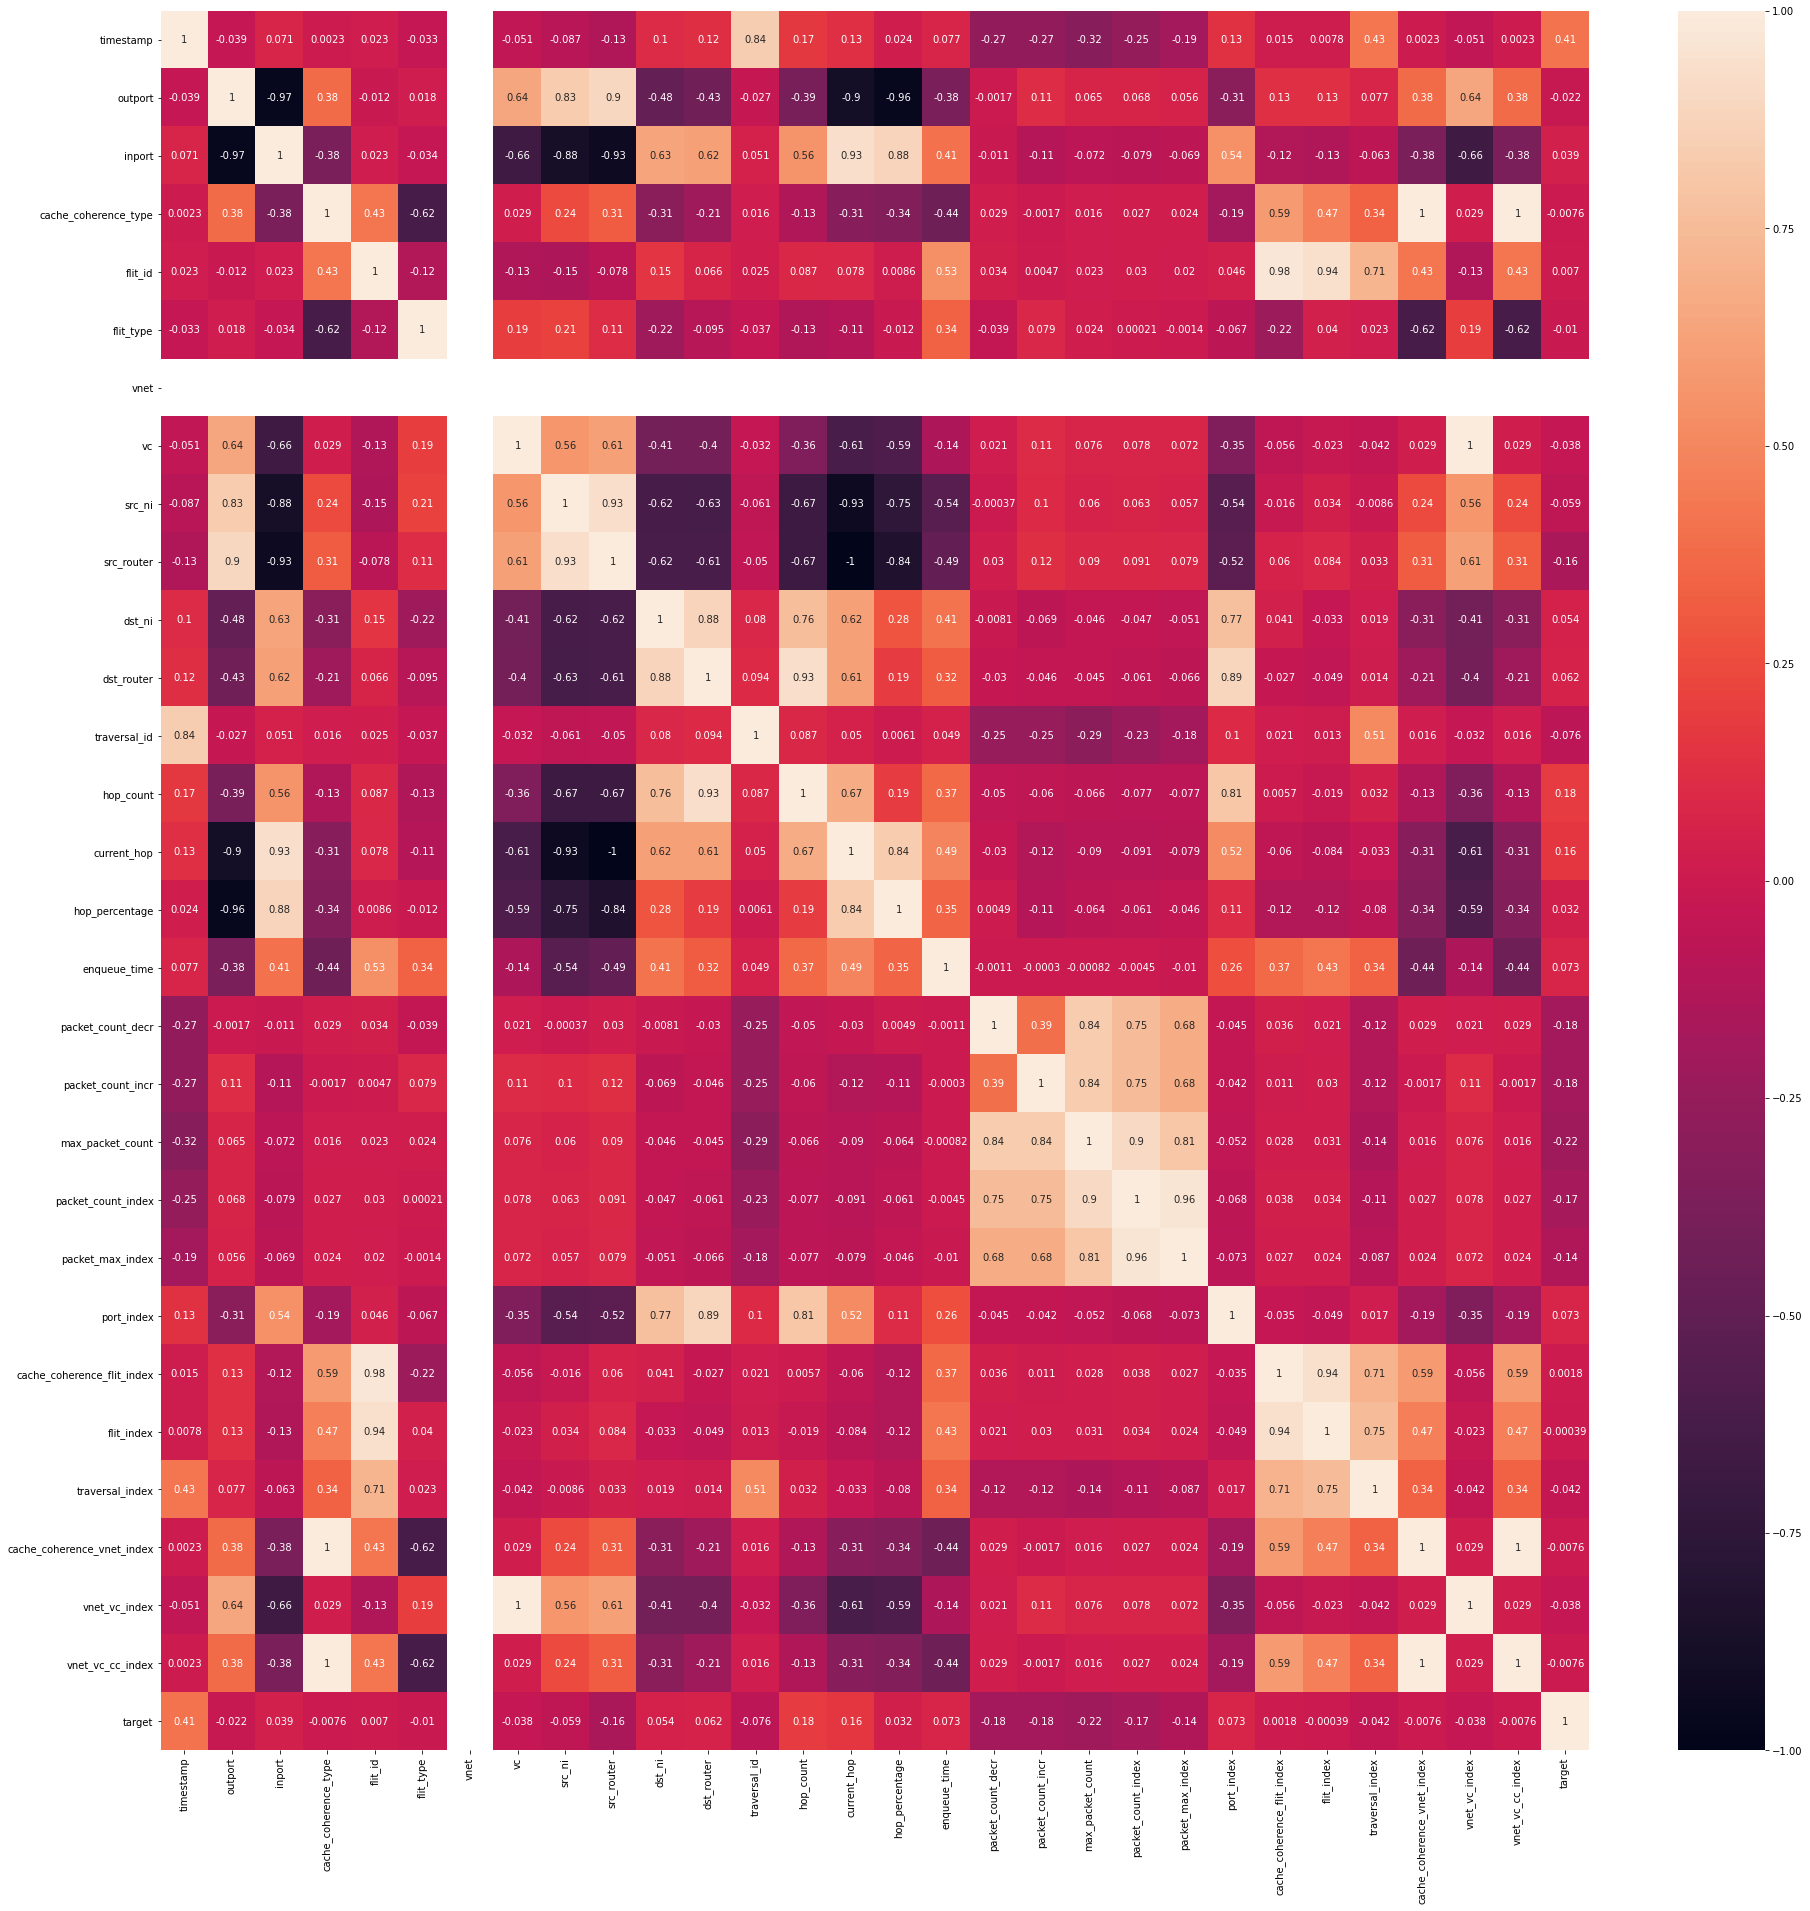

In [41]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [42]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1,4,1,1,4,3,9,23,7,1,3,2,0.666667,12,3,1,3,3,9,4,1,4,4,3,27,9
1,1,4,1,1,4,3,10,23,7,0,4,3,0.750000,16,2,2,3,4,12,4,1,4,0,3,30,9
2,1,4,1,1,4,3,9,23,7,0,4,3,0.750000,16,2,1,2,2,4,4,1,4,0,3,27,9
3,1,4,3,1,4,3,9,23,7,1,2,1,0.500000,8,1,3,3,3,9,4,3,12,12,9,27,27
4,1,4,3,1,4,3,9,23,7,0,2,1,0.500000,8,1,2,2,2,4,4,3,12,0,9,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28041,1,4,5,3,2,3,9,23,7,10018,4,3,0.750000,30,1,1,1,1,1,4,15,30,300540,15,27,45
28042,1,4,5,4,2,3,9,23,7,10018,4,3,0.750000,37,1,1,1,1,1,4,20,40,400720,15,27,45
28043,1,4,5,5,3,3,9,23,7,10018,4,3,0.750000,44,1,1,1,1,1,4,25,75,751350,15,27,45
28044,1,4,1,1,4,3,10,23,7,10019,4,3,0.750000,44,1,1,1,1,1,4,1,4,40076,3,30,9


In [43]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000090,0.25,0.666667,0.666667,0.190476,0.105263,0.000000,0.105263,0.018349,0.003638,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
1,0.25,1.0,0.000000,0.00,1.000000,0.0,0.333333,0.741935,0.466667,0.000000,0.50,1.000000,0.750000,0.285714,0.052632,0.052632,0.105263,0.027523,0.005002,1.0,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000
2,0.25,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.50,1.000000,0.750000,0.285714,0.052632,0.000000,0.052632,0.009174,0.001364,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.25,1.0,0.333333,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000090,0.00,0.333333,0.500000,0.095238,0.000000,0.105263,0.105263,0.018349,0.003638,1.0,0.068966,0.093023,0.000012,0.333333,0.000000,0.333333
4,0.25,1.0,0.333333,0.00,1.000000,0.0,0.000000,0.741935,0.466667,0.000000,0.00,0.333333,0.500000,0.095238,0.000000,0.052632,0.052632,0.009174,0.001364,1.0,0.068966,0.093023,0.000000,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28041,0.25,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.741935,0.466667,0.904152,0.50,1.000000,0.750000,0.619048,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.482759,0.302326,0.302531,0.666667,0.000000,0.666667
28042,0.25,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.741935,0.466667,0.904152,0.50,1.000000,0.750000,0.785714,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.655172,0.418605,0.403374,0.666667,0.000000,0.666667
28043,0.25,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.741935,0.466667,0.904152,0.50,1.000000,0.750000,0.952381,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.827586,0.825581,0.756327,0.666667,0.000000,0.666667
28044,0.25,1.0,0.000000,0.00,1.000000,0.0,0.333333,0.741935,0.466667,0.904242,0.50,1.000000,0.750000,0.952381,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.040341,0.000000,0.333333,0.000000


In [44]:
train_X[train_X.duplicated()].shape

(146, 26)

In [45]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.965695,0.375331,-0.012081,0.017569,NaN,0.644628,-0.480507,-0.425603,-0.027465,-0.385097,-0.898216,-0.962447,-0.379259,-0.001653,0.110325,0.065070,0.068463,0.056012,-0.307691,0.129393,0.129081,0.076523,0.375331,0.644628,0.375331,-0.021973
inport,-0.965695,1.000000,-0.381640,0.023163,-0.033678,NaN,-0.664382,0.632912,0.616964,0.051400,0.561191,0.933707,0.878051,0.405700,-0.010901,-0.108743,-0.071640,-0.078976,-0.069180,0.544216,-0.123632,-0.127290,-0.062910,-0.381640,-0.664382,-0.381640,0.039244
cache_coherence_type,0.375331,-0.381640,1.000000,0.425571,-0.617199,NaN,0.028977,-0.311514,-0.209251,0.015900,-0.127861,-0.314806,-0.342374,-0.439722,0.028983,-0.001736,0.016315,0.026779,0.023569,-0.185780,0.587179,0.465146,0.343340,1.000000,0.028977,1.000000,-0.007607
flit_id,-0.012081,0.023163,0.425571,1.000000,-0.118959,NaN,-0.129546,0.149840,0.065679,0.025487,0.086647,0.078214,0.008619,0.534706,0.033662,0.004732,0.022989,0.030469,0.019912,0.045842,0.976277,0.939888,0.712793,0.425571,-0.129546,0.425571,0.007017
flit_type,0.017569,-0.033678,-0.617199,-0.118959,1.000000,NaN,0.187951,-0.217424,-0.095394,-0.037244,-0.125724,-0.113439,-0.012485,0.341090,-0.039173,0.079287,0.024019,0.000208,-0.001433,-0.066641,-0.220692,0.040021,0.023152,-0.617199,0.187951,-0.617199,-0.010048
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.644628,-0.664382,0.028977,-0.129546,0.187951,NaN,1.000000,-0.411059,-0.398474,-0.032192,-0.357279,-0.612974,-0.588079,-0.144536,0.020553,0.106598,0.076135,0.077585,0.071672,-0.351755,-0.056316,-0.023184,-0.041809,0.028977,1.000000,0.028977,-0.037664
dst_ni,-0.480507,0.632912,-0.311514,0.149840,-0.217424,NaN,-0.411059,1.000000,0.878744,0.079557,0.758880,0.616546,0.282955,0.411965,-0.008139,-0.068909,-0.046134,-0.046547,-0.051040,0.766675,0.040851,-0.032999,0.018744,-0.311514,-0.411059,-0.311514,0.053839
dst_router,-0.425603,0.616964,-0.209251,0.065679,-0.095394,NaN,-0.398474,0.878744,1.000000,0.094124,0.931450,0.609390,0.186505,0.319249,-0.029712,-0.046109,-0.045400,-0.061491,-0.066201,0.885616,-0.026767,-0.049296,0.014289,-0.209251,-0.398474,-0.209251,0.062137
traversal_id,-0.027465,0.051400,0.015900,0.025487,-0.037244,NaN,-0.032192,0.079557,0.094124,1.000000,0.086634,0.050291,0.006134,0.049274,-0.245493,-0.245461,-0.293972,-0.231628,-0.180502,0.099603,0.021280,0.013305,0.511837,0.015900,-0.032192,0.015900,-0.075759


Principal Component Analysis

In [46]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.68968277,  1.08140062,  0.34251605, ..., -0.49929533,
         0.44262667,  0.14068493],
       [-0.78668098,  1.09925418,  0.4371086 , ...,  0.03829593,
         0.42960691,  0.26238803],
       [-0.92749745,  1.03563436,  0.34720403, ..., -0.34973943,
         0.43271941,  0.12568198],
       ...,
       [-0.74678092, -1.01320287, -0.06285683, ..., -0.14673127,
        -0.49326875,  0.18061463],
       [-0.9007879 ,  0.9967241 ,  0.42973466, ...,  0.10278391,
        -0.42782781, -0.01415132],
       [-0.32059572,  0.70635056,  0.35834168, ..., -0.65374402,
        -0.45021544,  0.35229297]])

In [47]:
pca.explained_variance_ratio_

array([0.42966935, 0.19118184, 0.13544076, 0.10543343, 0.03812099,
       0.03526763, 0.02028651])

Text(0, 0.5, 'Variance')

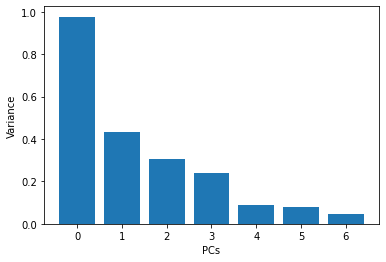

In [48]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [49]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,-0.689683,1.081401,0.342516,0.208896,-0.499295,0.442627,0.140685
1,-0.786681,1.099254,0.437109,0.359150,0.038296,0.429607,0.262388
2,-0.927497,1.035634,0.347204,0.234522,-0.349739,0.432719,0.125682
3,-0.303158,0.758972,0.329600,-0.044440,-0.628170,0.443227,0.396525
4,-0.304219,0.758762,0.329369,-0.045653,-0.629136,0.427296,0.395283
...,...,...,...,...,...,...,...
28041,-0.734034,-0.397636,0.142856,-0.133238,-0.016302,-0.433173,0.056893
28042,-0.748325,-0.670647,0.061371,0.095476,-0.001670,-0.431778,-0.008087
28043,-0.746781,-1.013203,-0.062857,0.607374,-0.146731,-0.493269,0.180615
28044,-0.900788,0.996724,0.429735,0.680300,0.102784,-0.427828,-0.014151


In [50]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,1.147952e-15,-3.636249e-15,1.528954e-16,8.709560e-16,-1.253718e-16,-2.747437e-15,-0.087685
1,1.147952e-15,1.000000e+00,-1.021343e-15,-2.162337e-16,1.077449e-15,-1.923708e-16,-1.309986e-15,-0.029200
2,-3.636249e-15,-1.021343e-15,1.000000e+00,-9.308605e-17,-2.228739e-15,7.593344e-16,3.826414e-15,0.049974
3,1.528954e-16,-2.162337e-16,-9.308605e-17,1.000000e+00,1.797234e-16,-2.779555e-16,1.433179e-15,0.001691
4,8.709560e-16,1.077449e-15,-2.228739e-15,1.797234e-16,1.000000e+00,-1.719135e-16,-7.215764e-16,0.064360
5,-1.253718e-16,-1.923708e-16,7.593344e-16,-2.779555e-16,-1.719135e-16,1.000000e+00,2.811537e-16,0.052953
6,-2.747437e-15,-1.309986e-15,3.826414e-15,1.433179e-15,-7.215764e-16,2.811537e-16,1.000000e+00,-0.011662
target,-8.768536e-02,-2.920046e-02,4.997391e-02,1.691467e-03,6.435990e-02,5.295314e-02,-1.166164e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

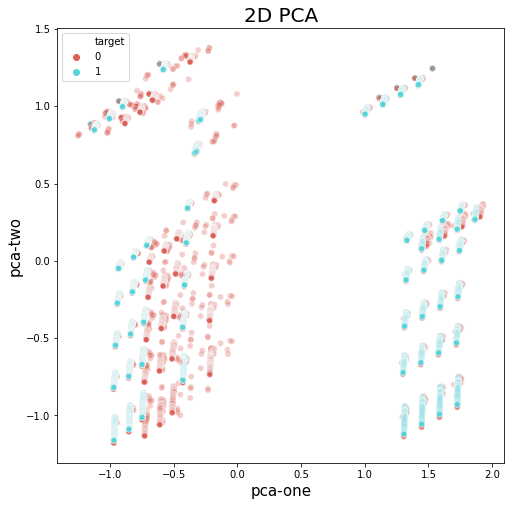

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

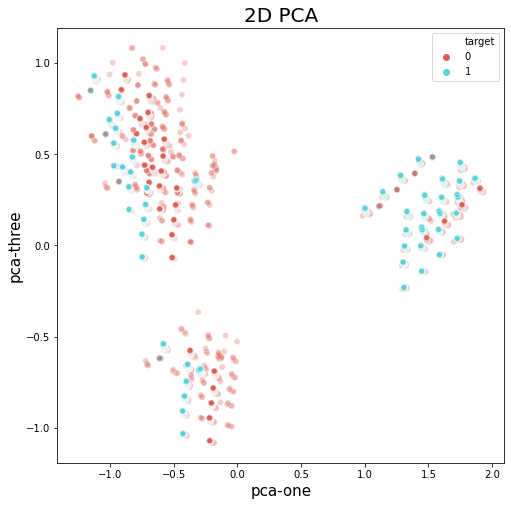

In [53]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

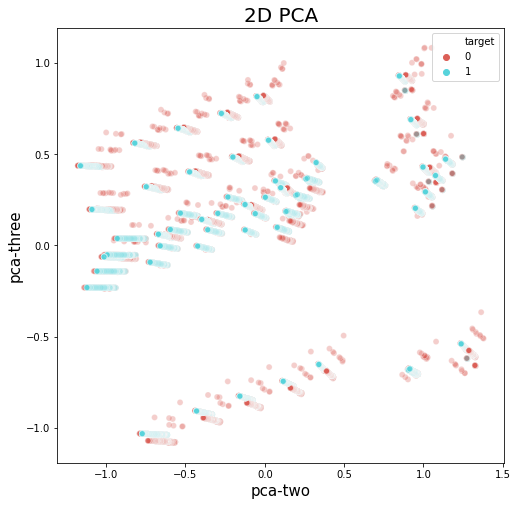

In [54]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

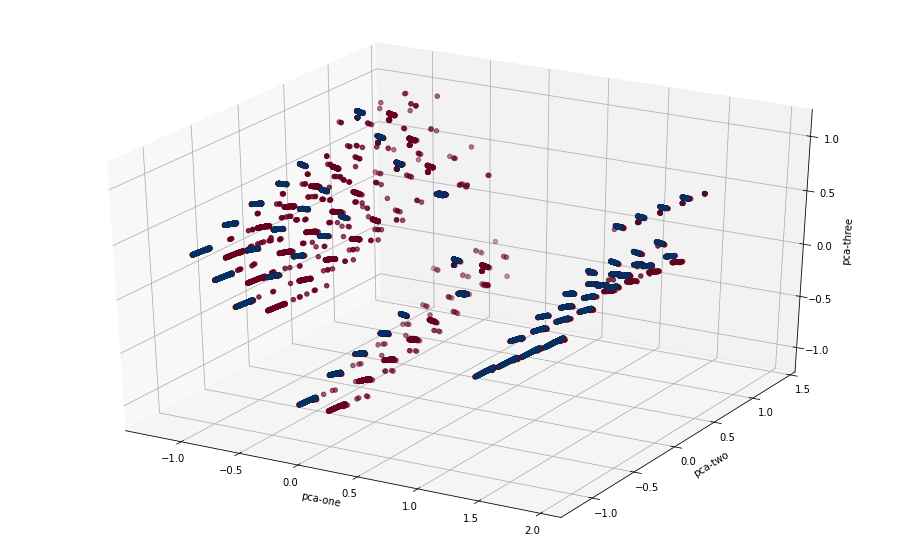

In [55]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

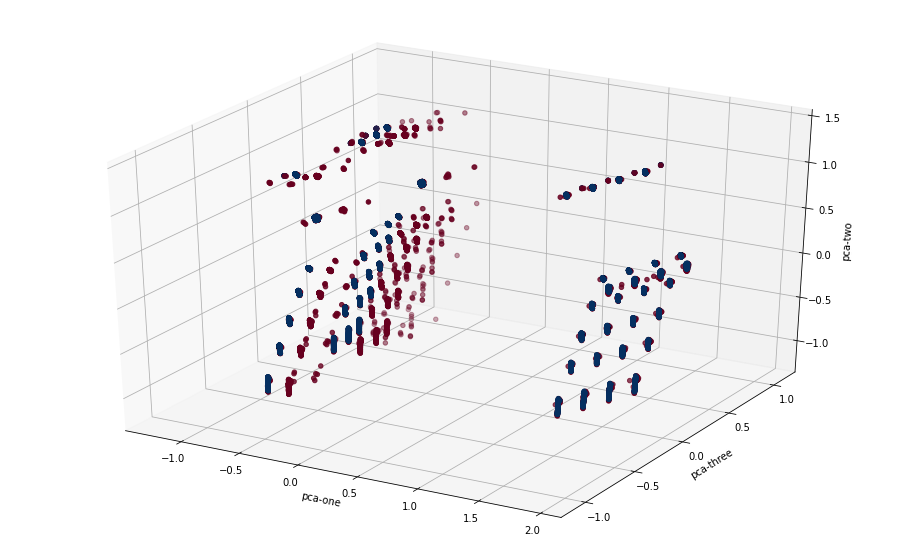

In [56]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

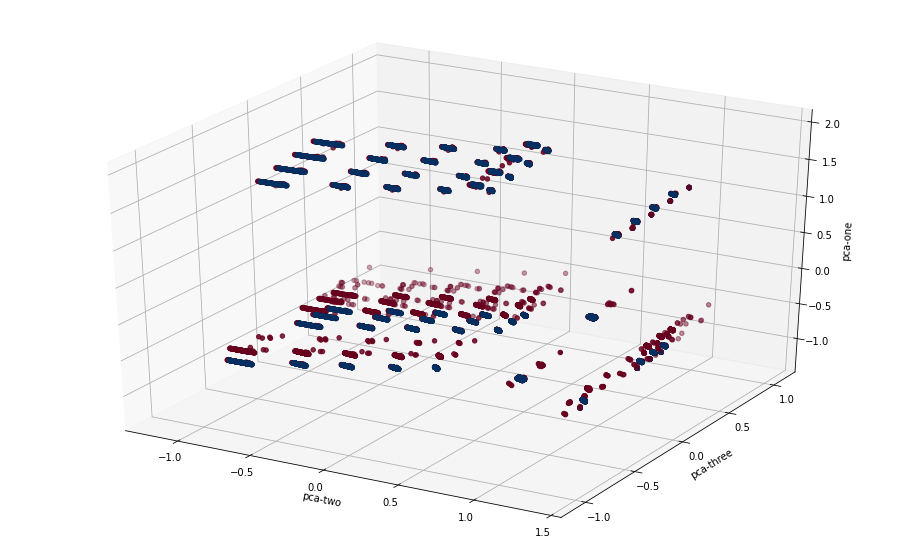

In [57]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [58]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 87.81916308403015 seconds


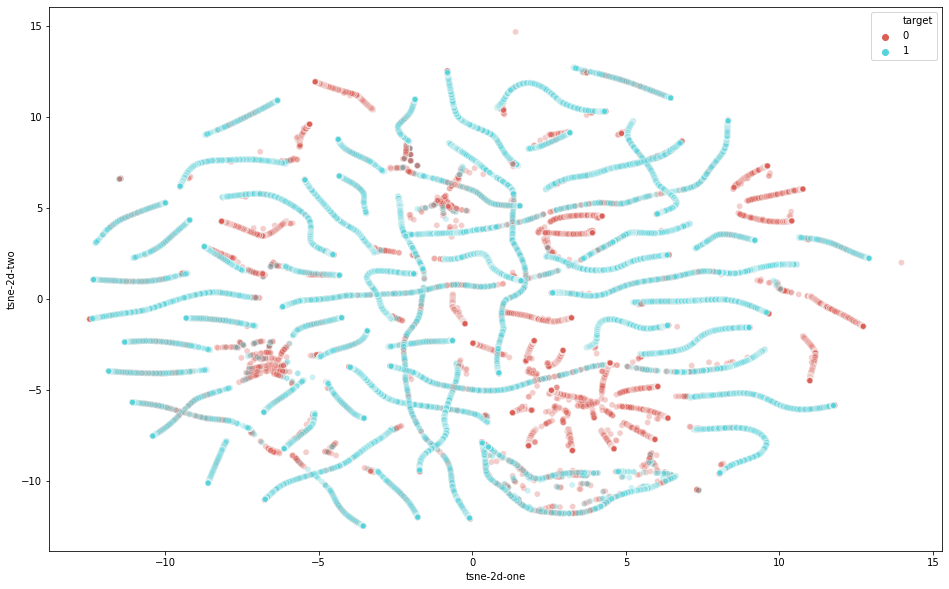

In [59]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

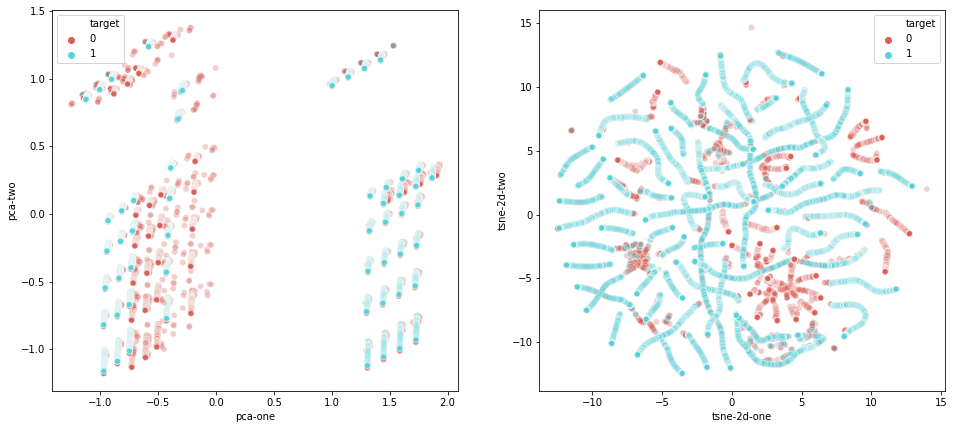

In [60]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [61]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 74.21597099304199 seconds


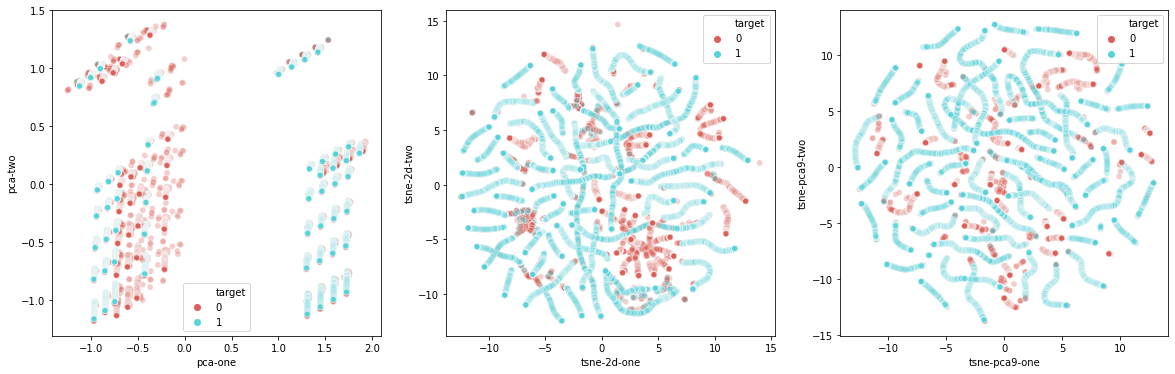

In [62]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [64]:
train_Y = df['target']
train_Y.value_counts()

0    15025
1    13021
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                 Specs       Score
16    max_packet_count  496.767055
10           hop_count  270.852492
15   packet_count_incr  250.691369
14   packet_count_decr  246.082385
17  packet_count_index  221.337748
11         current_hop  166.071062
18    packet_max_index  143.899979
19          port_index   70.259833
8           dst_router   26.302792
13        enqueue_time   19.867376
9         traversal_id   17.608616
6                   vc   14.276334
24       vnet_vc_index   14.276334
1               inport    8.656234
22     traversal_index    7.021418
12      hop_percentage    4.843372
7               dst_ni    4.420529


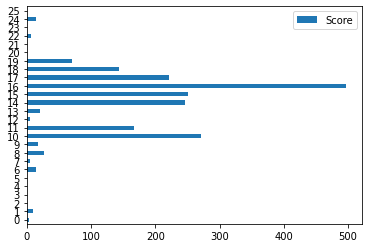

In [67]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(y_train,X_train)
#result=logit_model.fit(maxiter = 1000)
#print(result.summary2())

In [83]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 70.81030486717775
Test Prediction  71.6934046345811


In [85]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,dst_ni,11.372147
10,hop_count,7.183374
11,current_hop,6.342958
18,packet_max_index,4.444810
4,flit_type,4.407827
20,cache_coherence_flit_index,3.406112
1,inport,3.242598
17,packet_count_index,2.510165
25,vnet_vc_cc_index,0.907516
23,cache_coherence_vnet_index,0.907516


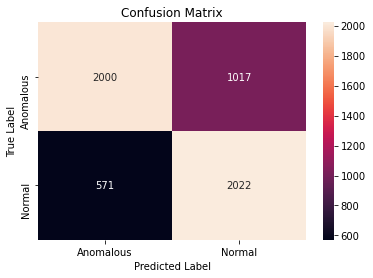

In [86]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [87]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.66      0.72      3017
           1       0.67      0.78      0.72      2593

    accuracy                           0.72      5610
   macro avg       0.72      0.72      0.72      5610
weighted avg       0.73      0.72      0.72      5610



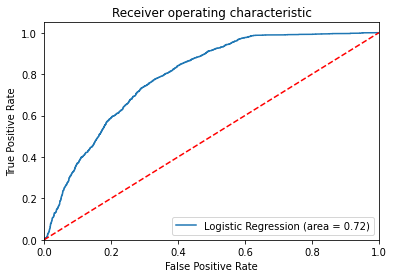

In [88]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [89]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [91]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 81.85505437689427
Test Prediction  74.36720142602495


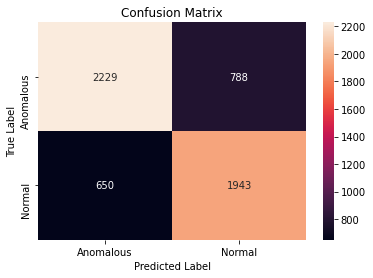

In [92]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [93]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      3017
           1       0.71      0.75      0.73      2593

    accuracy                           0.74      5610
   macro avg       0.74      0.74      0.74      5610
weighted avg       0.75      0.74      0.74      5610



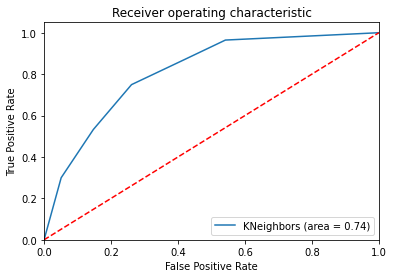

In [94]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [96]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [98]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 53.70832590479586
Test Prediction Score 53.244206773618544


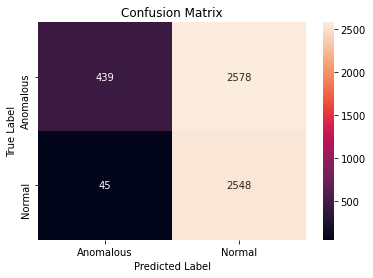

In [99]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [100]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.91      0.15      0.25      3017
           1       0.50      0.98      0.66      2593

    accuracy                           0.53      5610
   macro avg       0.70      0.56      0.46      5610
weighted avg       0.72      0.53      0.44      5610



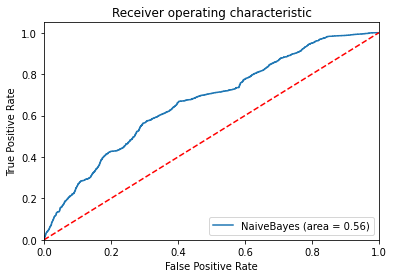

In [101]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [102]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [103]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 17948 samples, validate on 4488 samples
Epoch 1/10
17948/17948 [==============================] - 1s 52us/step - loss: 0.2488 - accuracy: 0.5150 - val_loss: 0.2416 - val_accuracy: 0.5379
Epoch 2/10
17948/17948 [==============================] - 1s 35us/step - loss: 0.2383 - accuracy: 0.5491 - val_loss: 0.2325 - val_accuracy: 0.6098
Epoch 3/10
17948/17948 [==============================] - 1s 39us/step - loss: 0.2315 - accuracy: 0.5942 - val_loss: 0.2266 - val_accuracy: 0.6165
Epoch 4/10
17948/17948 [==============================] - 1s 37us/step - loss: 0.2276 - accuracy: 0.6142 - val_loss: 0.2230 - val_accuracy: 0.6408
Epoch 5/10
17948/17948 [==============================] - 1s 36us/step - loss: 0.2248 - accuracy: 0.6307 - val_loss: 0.2209 - val_accuracy: 0.6535
Epoch 6/10
17948/17948 [==============================] - 1s 38us/step - loss: 0.2228 - accuracy: 0.6408 - val_loss: 0.2186 - val_accuracy: 0.6662
Epoch 7/10
17948/17948 [==============================] - 1s 40us/ste

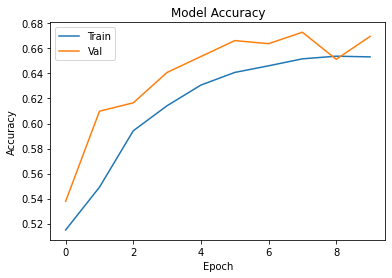

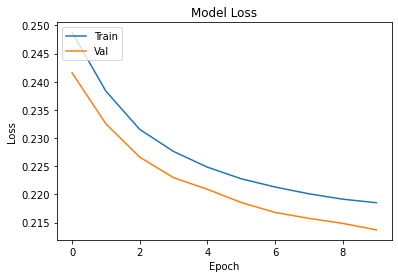

In [104]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [105]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.18%


3-Layer Neural Network

In [106]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 17948 samples, validate on 4488 samples
Epoch 1/15
17948/17948 [==============================] - 1s 38us/step - loss: 0.2579 - accuracy: 0.5174 - val_loss: 0.2500 - val_accuracy: 0.5227
Epoch 2/15
17948/17948 [==============================] - 1s 35us/step - loss: 0.2491 - accuracy: 0.5355 - val_loss: 0.2489 - val_accuracy: 0.5352
Epoch 3/15
17948/17948 [==============================] - 1s 35us/step - loss: 0.2489 - accuracy: 0.5323 - val_loss: 0.2487 - val_accuracy: 0.5345
Epoch 4/15
17948/17948 [==============================] - 1s 35us/step - loss: 0.2488 - accuracy: 0.5329 - val_loss: 0.2486 - val_accuracy: 0.5372
Epoch 5/15
17948/17948 [==============================] - 1s 41us/step - loss: 0.2488 - accuracy: 0.5335 - val_loss: 0.2486 - val_accuracy: 0.5377
Epoch 6/15
17948/17948 [==============================] - 1s 38us/step - loss: 0.2487 - accuracy: 0.5342 - val_loss: 0.2486 - val_accuracy: 0.5374
Epoch 7/15
17948/17948 [==============================] - 1s 35us/ste

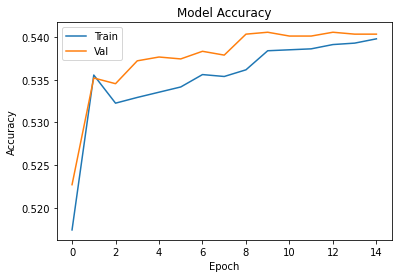

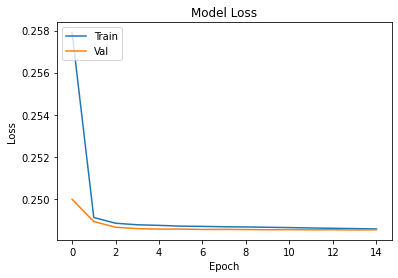

In [107]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [108]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 54.17%


4-Layer Neural Network



In [109]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 17948 samples, validate on 4488 samples
Epoch 1/30
17948/17948 [==============================] - 1s 41us/step - loss: 0.2496 - accuracy: 0.5344 - val_loss: 0.2487 - val_accuracy: 0.5379
Epoch 2/30
17948/17948 [==============================] - 1s 39us/step - loss: 0.2479 - accuracy: 0.5345 - val_loss: 0.2473 - val_accuracy: 0.5379
Epoch 3/30
17948/17948 [==============================] - 1s 42us/step - loss: 0.2469 - accuracy: 0.5345 - val_loss: 0.2464 - val_accuracy: 0.5379
Epoch 4/30
17948/17948 [==============================] - 1s 36us/step - loss: 0.2462 - accuracy: 0.5345 - val_loss: 0.2454 - val_accuracy: 0.5379
Epoch 5/30
17948/17948 [==============================] - 1s 37us/step - loss: 0.2452 - accuracy: 0.5345 - val_loss: 0.2440 - val_accuracy: 0.5379
Epoch 6/30
17948/17948 [==============================] - 1s 38us/step - loss: 0.2438 - accuracy: 0.5345 - val_loss: 0.2422 - val_accuracy: 0.5379
Epoch 7/30
17948/17948 [==============================] - 1s 36us/ste

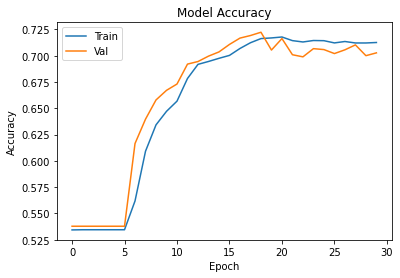

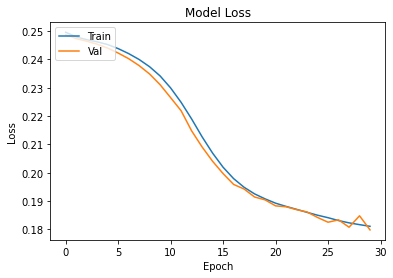

In [110]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [111]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.60%


5-Layer Neural Network Optimized

In [112]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 17948 samples, validate on 4488 samples
Epoch 1/100
17948/17948 [==============================] - 2s 96us/step - loss: 0.2015 - accuracy: 0.6703 - val_loss: 0.1901 - val_accuracy: 0.6689
Epoch 2/100
17948/17948 [==============================] - 1s 65us/step - loss: 0.1863 - accuracy: 0.6948 - val_loss: 0.1786 - val_accuracy: 0.7268
Epoch 3/100
17948/17948 [==============================] - 1s 76us/step - loss: 0.1787 - accuracy: 0.7167 - val_loss: 0.1718 - val_accuracy: 0.7373
Epoch 4/100
17948/17948 [==============================] - 1s 65us/step - loss: 0.1761 - accuracy: 0.7202 - val_loss: 0.1686 - val_accuracy: 0.7362
Epoch 5/100
17948/17948 [==============================] - 1s 69us/step - loss: 0.1734 - accuracy: 0.7274 - val_loss: 0.1791 - val_accuracy: 0.7086
Epoch 6/100
17948/17948 [==============================] - 1s 66us/step - loss: 0.1721 - accuracy: 0.7314 - val_loss: 0.1627 - val_accuracy: 0.7538
Epoch 7/100
17948/17948 [==============================] - 1s 6

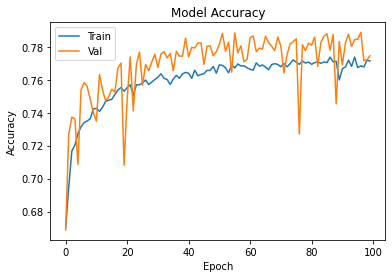

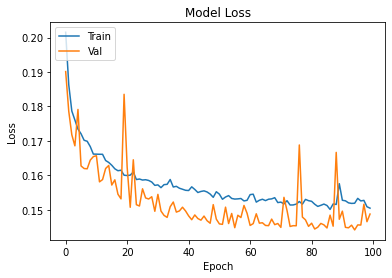

In [113]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [114]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.81%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [116]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 24, 'max_features': 24}
Accuracy : 0.8452488697275733


In [117]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [119]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 95.61864860046354
Test Prediction Score 88.18181818181819


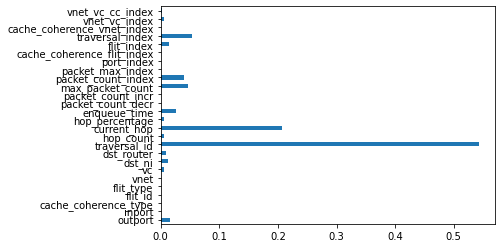

In [120]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

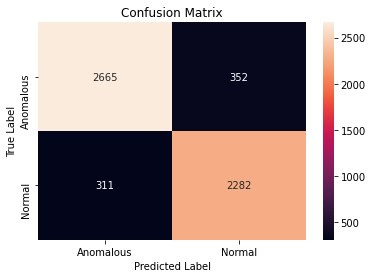

In [121]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [122]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      3017
           1       0.87      0.88      0.87      2593

    accuracy                           0.88      5610
   macro avg       0.88      0.88      0.88      5610
weighted avg       0.88      0.88      0.88      5610



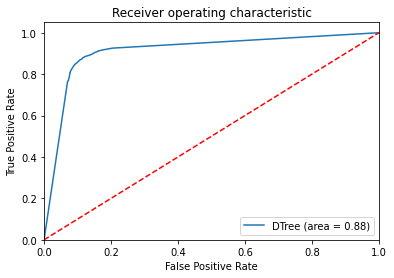

In [123]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [127]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [129]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.96594758423961
Test Prediction Score 87.77183600713012


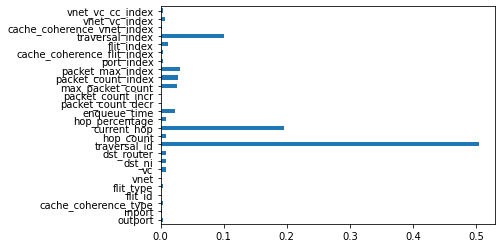

In [130]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

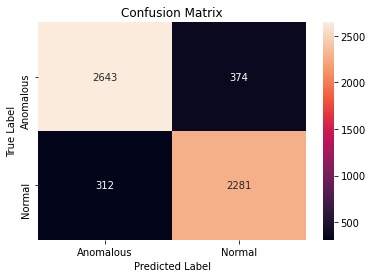

In [131]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [132]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3017
           1       0.86      0.88      0.87      2593

    accuracy                           0.88      5610
   macro avg       0.88      0.88      0.88      5610
weighted avg       0.88      0.88      0.88      5610



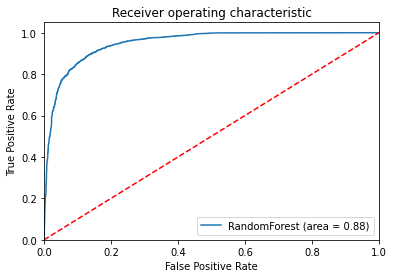

In [133]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [136]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [138]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.5008022820467
Test Prediction Score 93.40463458110517


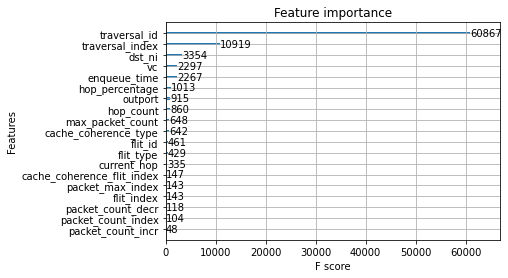

In [139]:
plot_importance(xgbc)
plt.show()

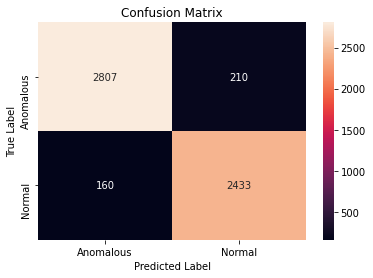

In [140]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [141]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3017
           1       0.92      0.94      0.93      2593

    accuracy                           0.93      5610
   macro avg       0.93      0.93      0.93      5610
weighted avg       0.93      0.93      0.93      5610



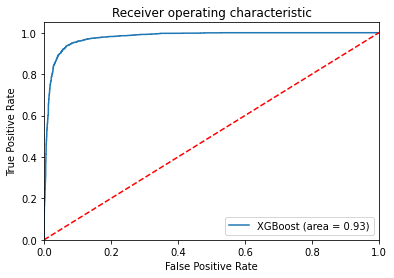

In [142]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [145]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [147]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 87.32394366197182
Test Prediction Score 78.39572192513369


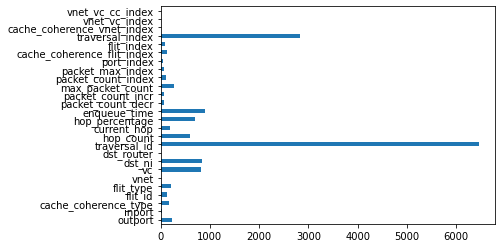

In [148]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

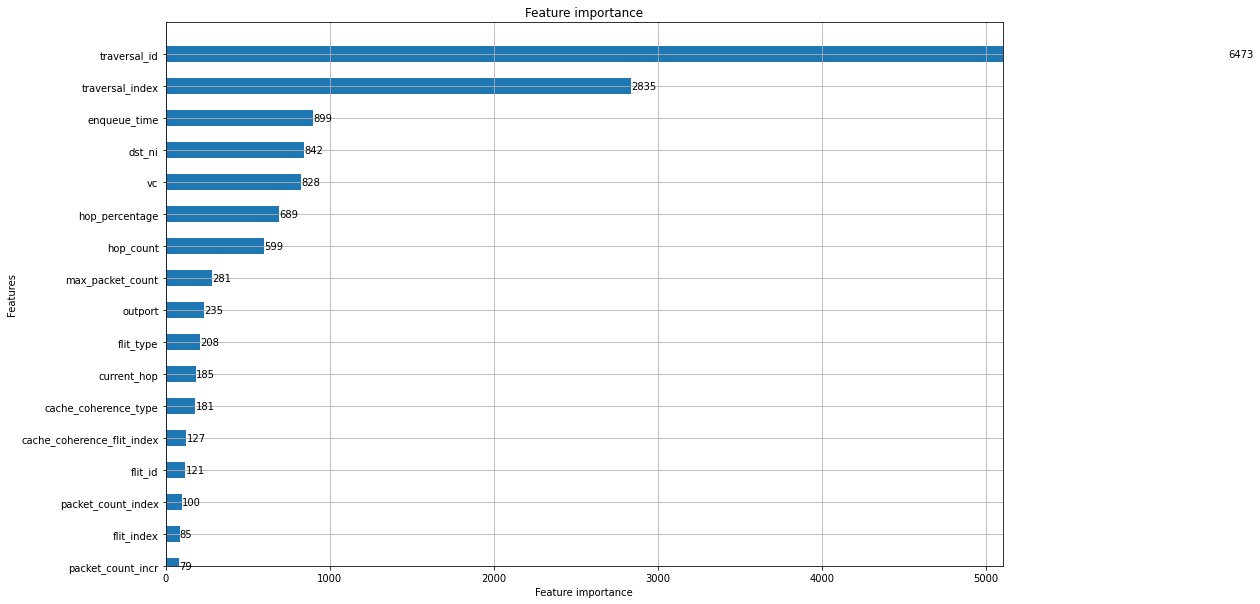

In [149]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,5100), ylim = (0,17), figsize = (15,10))
plt.show()

In [150]:
sorted(gbm.feature_importances_,reverse=True)

[6473,
 2835,
 899,
 842,
 828,
 689,
 599,
 281,
 235,
 208,
 185,
 181,
 127,
 121,
 100,
 85,
 79,
 72,
 70,
 55,
 31,
 5,
 0,
 0,
 0,
 0]

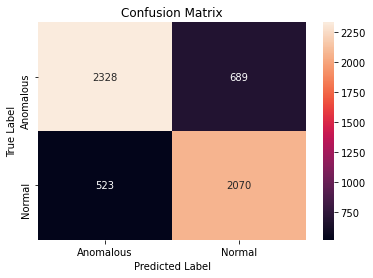

In [151]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [152]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      3017
           1       0.75      0.80      0.77      2593

    accuracy                           0.78      5610
   macro avg       0.78      0.78      0.78      5610
weighted avg       0.79      0.78      0.78      5610



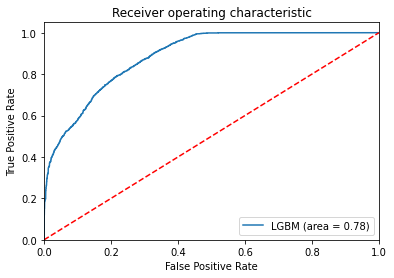

In [153]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()